# 1、最基础的分类算法 - k 近邻算法 

+ 创建数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

raw_data_X = [[3.39353321, 2.33127338],
              [3.11007348, 1.78153964],
              [1.34380883, 3.36836095],
              [3.58229404, 4.67917911],
              [2.28036244, 2.86699026],
              [7.42343694, 4.69652288],
              [5.745052, 3.5339898],
              [9.17216862, 2.51110105],
              [7.79278348, 3.424088894],
              [7.93982082, 0.79163723]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

## 封装成 NumPy 矩阵

In [2]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

**下面的这个技巧很常用**：通过标签得到对应的特征矩阵。

可视化。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


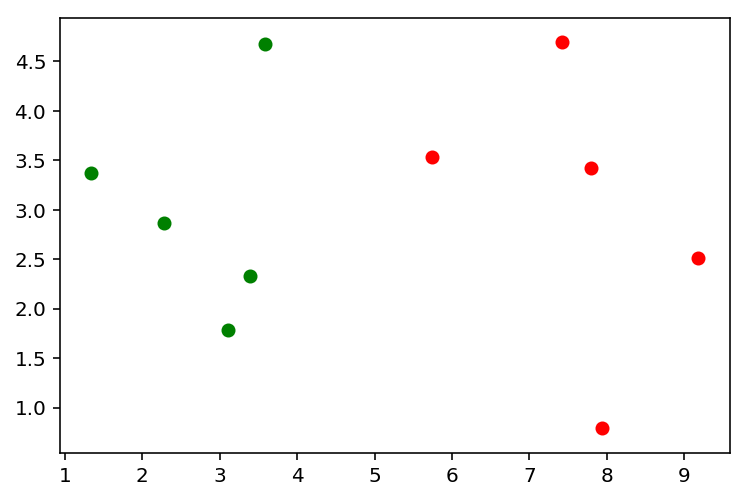

In [3]:
# 绘制类标为 0 的点
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='green')
# 绘制类标为 1 的点
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red')
plt.show()

**注意**：上面的这张图中，$x$ 轴和 $y$ 轴都是特征。标记体现在点的颜色上。

In [4]:
# 要预测的点
X = np.array([8.093607318, 3.365731514])

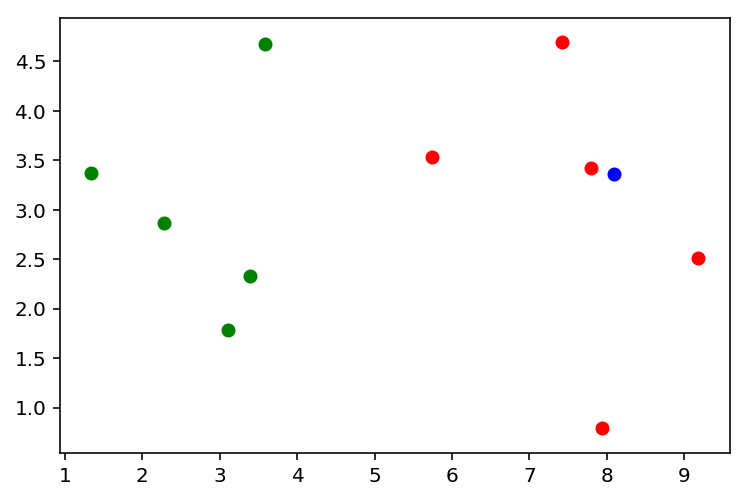

In [5]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='green')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red')
plt.scatter(X[0],X[1],color='b')
plt.show()

## k 近邻算法的流程

1. 计算待预测的数据点与训练数据集中所有已知点的距离，装入一个 List 容器中；
2. 对上面的 List 容器中的数据从小到大排列，取出其中的 $k$ 个；
3. 对其中的 $k$ 个进行投票；

In [6]:
from math import sqrt

distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - X)**2))
    distances.append(d)
distances

[4.812566908801451,
 5.229270829488432,
 6.7497990001585055,
 4.698626616331339,
 5.834600144828669,
 1.4900114077982114,
 2.354574894224802,
 1.3761132628416863,
 0.3064319913284428,
 2.5786840965671964]

上面的方法比较麻烦，可以直接使用 Python 提供的列表功能完成，这一步也叫**向量化**。

In [7]:
distances = [sqrt(np.sum((x_train - X)**2)) for x_train in X_train]
# 可以看到效果一样
distances

[4.812566908801451,
 5.229270829488432,
 6.7497990001585055,
 4.698626616331339,
 5.834600144828669,
 1.4900114077982114,
 2.354574894224802,
 1.3761132628416863,
 0.3064319913284428,
 2.5786840965671964]

还可以直接使用 `np.linalg.norm` 函数完成欧式距离的计算。

In [8]:
import numpy as np

[np.linalg.norm(x_train - X) for x_train in X_train]

[4.812566908801451,
 5.229270829488432,
 6.7497990001585055,
 4.698626616331339,
 5.834600144828669,
 1.4900114077982114,
 2.354574894224802,
 1.3761132628416863,
 0.3064319913284428,
 2.5786840965671964]

In [9]:
nearest = np.argsort(distances)

In [10]:
# 使用列表生成式，得到指定索引的标签值，然后进行投票
k = 6
topK_y = [y_train[i] for i in nearest[:k]]

In [11]:
topK_y

[1, 1, 1, 1, 1, 0]

In [12]:
from collections import Counter

Counter(topK_y)

Counter({0: 1, 1: 5})

In [13]:
votes = Counter(topK_y)

In [14]:
votes.most_common(1)

[(1, 5)]

In [15]:
votes.most_common(2)

[(1, 5), (0, 1)]

In [16]:
votes.most_common(1)[0][0]

1

In [17]:
predict = votes.most_common(1)[0][0]

In [18]:
predict

1

## 把上面的代码封装到一个模块，命名为 kNN_classify

In [19]:
from playML.kNN import kNN_classify

In [20]:
kNN_classify(k=6, X_train=X_train, y_train=y_train, x=X)

1

### Count 的用法

In [21]:
lst = [1,2,3,4,4,3,4,5,6]

from collections import Counter

votes = Counter(lst)
votes.most_common(4)

[(4, 3), (3, 2), (1, 1), (2, 1)]

---
下面是题外话，与本节内容无关。

## 向量化的性能测试

In [22]:
m = 100

big_x = np.random.random(size=m)
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m)

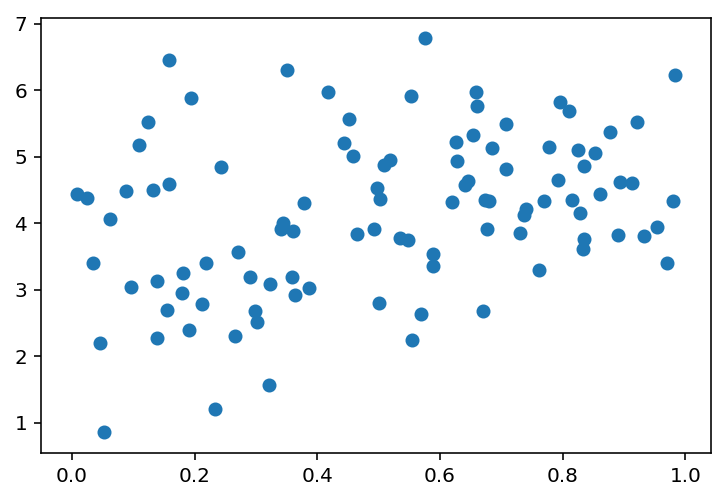

In [23]:
plt.scatter(big_x,big_y)
plt.show()

In [24]:
%timeit [i**2 for i in range(10)]
%timeit [i**2 for i in range(100)]

100000 loops, best of 3: 3.37 µs per loop
10000 loops, best of 3: 31.6 µs per loop
